## Today, we are having fun with w2v and our intent is to visualize words in a 3d space. We are going to get there gradually. 

In [23]:
import tensorflow as tf
import pandas as pd
import numpy as np 
from sklearn.decomposition import PCA
from matplotlib import pyplot
from gensim.models import Word2Vec

In [13]:
text = 'Hello this is my friend Bob. I am learning how to visualize w2v. How can we learn w2v? is it about words'
sentences = text.split('.')
sentences_final = []
for sen in sentences:
    tokens = sen.split()
    sentences_final.append(tokens)

sentences_final #it's importanty to have the sentence list as a nested list, like shown below.

[['Hello', 'this', 'is', 'my', 'friend', 'Bob'],
 ['I', 'am', 'learning', 'how', 'to', 'visualize', 'w2v'],
 ['How', 'can', 'we', 'learn', 'w2v?', 'is', 'it', 'about', 'words']]

In [21]:
# train model
our_model = Word2Vec(sentences_final, min_count=1)
# summarize vocabulary
words = list(our_model.wv.vocab)
# access vector for one word
print(our_model['friend'])

[-4.3213079e-03 -1.3445088e-03 -2.8130952e-03 -4.7966926e-03
  4.3208133e-03 -4.3228096e-03  2.8914467e-03  3.6103935e-03
  1.2636280e-03 -2.6652382e-03 -4.7216439e-03 -1.7439565e-03
 -3.0683284e-03 -3.2390361e-03 -4.1985796e-03 -2.7504845e-03
  3.2337138e-03 -3.2368717e-03 -1.5516770e-03 -7.7926234e-05
  3.0014557e-03  1.4377327e-03 -2.4676954e-03  3.1345938e-03
  1.4582090e-03 -6.2220270e-04  1.0168055e-04 -3.0499171e-03
  2.9794937e-03  2.4324995e-04  6.8379886e-04  1.8655955e-03
  2.8322386e-03  1.8074811e-03  3.1856420e-03  3.4121918e-03
 -9.7347895e-04 -8.9635269e-04  4.5342911e-03 -2.8555847e-03
 -3.5468943e-04  4.3026819e-03 -4.7916494e-04  2.7318217e-03
  2.3112495e-03  2.4893351e-03 -3.6422117e-03  8.2598935e-04
 -4.7637601e-03 -4.9881306e-03 -4.4804676e-03 -3.5865130e-03
 -1.6068319e-03 -2.8211877e-03  2.6815829e-03 -3.8063871e-03
  2.7477553e-03  2.8156347e-03 -2.6051835e-03 -2.0157541e-03
  2.0048656e-03 -4.6926276e-03  5.5153767e-04 -5.8125012e-04
  2.8526813e-03  4.85251

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Unfortunately the visualization below is still 2d and it's not the final output we are looking for, even though it still is giving us an idea of how words are located into a 2d space. If two words are very close this means that they are similar. It is totally the same as a PCA. 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


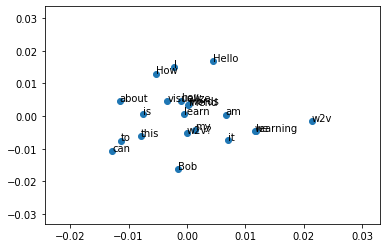

In [27]:
#visualize using PCA 
X = our_model[our_model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(our_model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Taking it to the next level

In [29]:
#importing the python package
from sklearn.manifold import TSNE

In [37]:
#creating the dataframe that has 3 coordinates for each word. We need three in order to create the 3d scatter plot
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index = words,columns=['x', 'y', 'z'])
df

,x,y,z
Hello,-431.224579,-397.571075,1.186124
this,-20.699764,60.361427,249.742538
is,177.634750,-93.870819,295.623810
my,262.298248,411.844391,-69.658562
friend,-128.665176,162.700531,-121.826080
Bob,-117.172646,-260.886749,5.797359
I,318.249176,-69.680901,33.359795
am,-212.482727,235.414948,138.099289
learning,142.881500,-332.091858,173.116013
how,229.518158,138.825745,-159.912140


In [38]:
#VISUALIZATION PACKAGE. WE ARE DOING IT WITH PLOTLY INTERACTIVE
import plotly.express as px

In [46]:
fig = px.scatter_3d(df, x='x', y='y', z='z', text = df.index, template='plotly_white')
fig.show()

## Getting the list of most similar words

In [53]:
#get most similar words
our_model.most_similar(positive='Hello')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).



[('How', 0.163746178150177),
 ('I', 0.1582333892583847),
 ('am', 0.11916308104991913),
 ('friend', 0.10686364024877548),
 ('it', 0.011339455842971802),
 ('learning', 0.010364614427089691),
 ('visualize', 0.006330113857984543),
 ('learn', -0.004494182765483856),
 ('how', -0.01421617716550827),
 ('w2v?', -0.031366512179374695)]